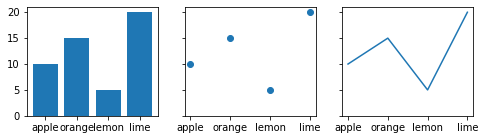

In [20]:
#Plotting categorical variables
import matplotlib.pyplot as plt
data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())
fig, axs = plt.subplots(1, 3, figsize=(8,2), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)

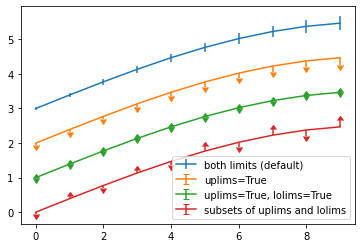

In [33]:
#Errorbar limit selection
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)
plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')
plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')
plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,label='uplims=True, lolims=True')
upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,label='subsets of uplims and lolims')
plt.legend(loc='lower right')

In [40]:
import itertools
from functools import partial

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cycler import cycler


def filled_hist(ax, edges, values, bottoms=None, orientation='v',
                **kwargs):

    print(orientation)
    if orientation not in 'hv':
        raise ValueError("orientation must be in {{'h', 'v'}} "
                         "not {o}".format(o=orientation))

    kwargs.setdefault('step', 'post')
    kwargs.setdefault('alpha', 0.7)
    edges = np.asarray(edges)
    values = np.asarray(values)
    if len(edges) - 1 != len(values):
        raise ValueError('Must provide one more bin edge than value not: '
                         'len(edges): {lb} len(values): {lv}'.format(
                             lb=len(edges), lv=len(values)))

    if bottoms is None:
        bottoms = 0
    bottoms = np.broadcast_to(bottoms, values.shape)

    values = np.append(values, values[-1])
    bottoms = np.append(bottoms, bottoms[-1])
    if orientation == 'h':
        return ax.fill_betweenx(edges, values, bottoms,
                                **kwargs)
    elif orientation == 'v':
        return ax.fill_between(edges, values, bottoms,
                               **kwargs)
    else:
        raise AssertionError("you should never be here")


def stack_hist(ax, stacked_data, sty_cycle, bottoms=None,
               hist_func=None, labels=None,
               plot_func=None, plot_kwargs=None):

    # deal with default binning function
    if hist_func is None:
        hist_func = np.histogram

    # deal with default plotting function
    if plot_func is None:
        plot_func = filled_hist

    # deal with default
    if plot_kwargs is None:
        plot_kwargs = {}
    print(plot_kwargs)
    try:
        l_keys = stacked_data.keys()
        label_data = True
        if labels is None:
            labels = l_keys

    except AttributeError:
        label_data = False
        if labels is None:
            labels = itertools.repeat(None)

    if label_data:
        loop_iter = enumerate((stacked_data[lab], lab, s)
                              for lab, s in zip(labels, sty_cycle))
    else:
        loop_iter = enumerate(zip(stacked_data, labels, sty_cycle))

    arts = {}
    for j, (data, label, sty) in loop_iter:
        if label is None:
            label = 'dflt set {n}'.format(n=j)
        label = sty.pop('label', label)
        vals, edges = hist_func(data)
        if bottoms is None:
            bottoms = np.zeros_like(vals)
        top = bottoms + vals
        print(sty)
        sty.update(plot_kwargs)
        print(sty)
        ret = plot_func(ax, edges, top, bottoms=bottoms,
                        label=label, **sty)
        bottoms = top
        arts[label] = ret
    ax.legend(fontsize=10)
    return arts


# set up histogram function to fixed bins
edges = np.linspace(-3, 3, 20, endpoint=True)
hist_func = partial(np.histogram, bins=edges)

# set up style cycles
color_cycle = cycler(facecolor=plt.rcParams['axes.prop_cycle'][:4])
label_cycle = cycler(label=['set {n}'.format(n=n) for n in range(4)])
hatch_cycle = cycler(hatch=['/', '*', '+', '|'])

# Fixing random state for reproducibility
np.random.seed(19680801)

stack_data = np.random.randn(4, 12250)
dict_data = dict(zip((c['label'] for c in label_cycle), stack_data))

{}
{'facecolor': '#1f77b4', 'hatch': '/'}
{'facecolor': '#1f77b4', 'hatch': '/'}
v
{'facecolor': '#ff7f0e', 'hatch': '*'}
{'facecolor': '#ff7f0e', 'hatch': '*'}
v
{'facecolor': '#2ca02c', 'hatch': '+'}
{'facecolor': '#2ca02c', 'hatch': '+'}
v
{'facecolor': '#d62728', 'hatch': '|'}
{'facecolor': '#d62728', 'hatch': '|'}
v
{'edgecolor': 'w', 'orientation': 'h'}
{'facecolor': '#1f77b4'}
{'facecolor': '#1f77b4', 'edgecolor': 'w', 'orientation': 'h'}
h
{'facecolor': '#ff7f0e'}
{'facecolor': '#ff7f0e', 'edgecolor': 'w', 'orientation': 'h'}
h
{'facecolor': '#2ca02c'}
{'facecolor': '#2ca02c', 'edgecolor': 'w', 'orientation': 'h'}
h
{'facecolor': '#d62728'}
{'facecolor': '#d62728', 'edgecolor': 'w', 'orientation': 'h'}
h


Text(0, 0.5, 'x')

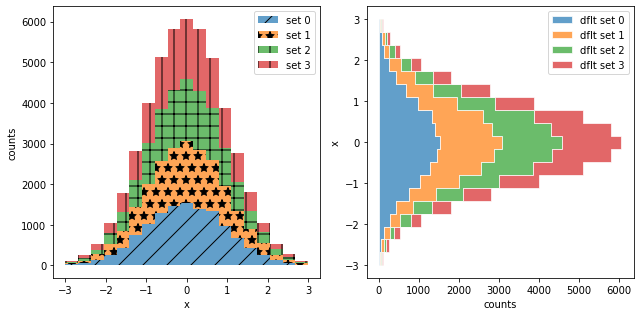

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)
arts = stack_hist(ax1, stack_data, color_cycle + label_cycle + hatch_cycle,
                  hist_func=hist_func)

arts = stack_hist(ax2, stack_data, color_cycle,
                  hist_func=hist_func,
                  plot_kwargs=dict(edgecolor='w', orientation='h'))
ax1.set_ylabel('counts')
ax1.set_xlabel('x')
ax2.set_xlabel('counts')
ax2.set_ylabel('x')

{}
{'facecolor': '#1f77b4', 'hatch': '/'}
{'facecolor': '#1f77b4', 'hatch': '/'}
v
{'facecolor': '#ff7f0e', 'hatch': '*'}
{'facecolor': '#ff7f0e', 'hatch': '*'}
v
{'facecolor': '#2ca02c', 'hatch': '+'}
{'facecolor': '#2ca02c', 'hatch': '+'}
v
{'facecolor': '#d62728', 'hatch': '|'}
{'facecolor': '#d62728', 'hatch': '|'}
v
{}
{'facecolor': '#1f77b4', 'hatch': '/'}
{'facecolor': '#1f77b4', 'hatch': '/'}
v
{'facecolor': '#ff7f0e', 'hatch': '*'}
{'facecolor': '#ff7f0e', 'hatch': '*'}
v


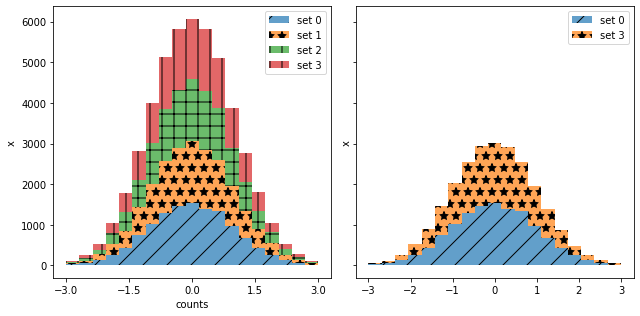

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5),
                               tight_layout=True, sharey=True)

arts = stack_hist(ax1, dict_data, color_cycle + hatch_cycle,
                  hist_func=hist_func)

arts = stack_hist(ax2, dict_data, color_cycle + hatch_cycle,
                  hist_func=hist_func, labels=['set 0', 'set 3'])
ax1.xaxis.set_major_locator(mticker.MaxNLocator(5))
ax1.set_xlabel('counts')
ax1.set_ylabel('x')
ax2.set_ylabel('x')

plt.show()

In [43]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
   
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

NameError: name 'harvest' is not defined

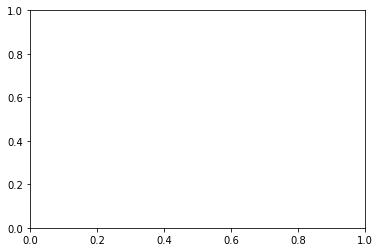

In [45]:
fig, ax = plt.subplots()

im, cbar = heatmap(harvest, vegetables, farmers, ax=ax,
                   cmap="YlGn", cbarlabel="harvest [t/year]")
texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()